From the data analyzed, it appears to show a strong direct correlation between latitude and temperature.  Temperatures in proximity to the equator appeared the highest, with low temperatures appearing in cities furthest from the equator both north and south.  Wind speed also seemed to be lower the closer the city was to the equator. Cloudiness seemed to show a very weak correlation, with the possibility of no real relation or possibly only being driven by the wind factor.

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# URL
weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(weather_api_key)

fdb67c0867a57dc1d67961b8dbef4aa1


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [4]:
#  Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

citys = []
cloud = []
humid = []
lats = []
lngs = []
temp = []
wind = []
countries = []

count = 1

# loop for dataframe columns
for city in cities:
    print(f"Processing {count} || {city}")
    try:
        response = requests.get(weather_url + city.replace(" ","&")).json()
        citys.append(response['name'])
        cloud.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humid.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
    except Exception:
        print("City not found. Skip me.")
    count += 1
print("End City List")

Processing 1 || uruzgan
Processing 2 || griffith
Processing 3 || kapaa
Processing 4 || srostki
Processing 5 || babanusah
City not found. Skip me.
Processing 6 || sitka
Processing 7 || khatanga
Processing 8 || touros
Processing 9 || barentsburg
City not found. Skip me.
Processing 10 || kajaani
Processing 11 || gushikawa
Processing 12 || taolanaro
City not found. Skip me.
Processing 13 || ilulissat
Processing 14 || guerrero negro
Processing 15 || tiksi
Processing 16 || hithadhoo
Processing 17 || sao filipe
Processing 18 || tilichiki
Processing 19 || torbay
Processing 20 || belmonte
Processing 21 || faanui
Processing 22 || luderitz
Processing 23 || barbar
City not found. Skip me.
Processing 24 || albany
Processing 25 || mataura
Processing 26 || rio grande
Processing 27 || ushuaia
Processing 28 || aksay
Processing 29 || bur gabo
Processing 30 || san patricio
Processing 31 || vestmannaeyjar
Processing 32 || nome
Processing 33 || palabuhanratu
City not found. Skip me.
Processing 34 || longye

Processing 283 || mandalgovi
Processing 284 || cidreira
Processing 285 || astana
Processing 286 || northam
Processing 287 || attawapiskat
City not found. Skip me.
Processing 288 || muroto
Processing 289 || rio gallegos
Processing 290 || mys shmidta
Processing 291 || yirol
City not found. Skip me.
Processing 292 || alkhan-yurt
Processing 293 || chokurdakh
Processing 294 || riverton
Processing 295 || algeciras
Processing 296 || pierre
Processing 297 || comodoro rivadavia
Processing 298 || victoria point
Processing 299 || fairbanks
Processing 300 || coevorden
Processing 301 || mayo
Processing 302 || labuhan
Processing 303 || kropotkin
Processing 304 || pangnirtung
Processing 305 || po
City not found. Skip me.
Processing 306 || trinidad
Processing 307 || oktyabrskoye
Processing 308 || vostok
Processing 309 || klaksvik
Processing 310 || buala
Processing 311 || pasighat
Processing 312 || lebu
Processing 313 || mitla
Processing 314 || hibbing
Processing 315 || puri
Processing 316 || sulangan


Processing 552 || tres barras
Processing 553 || cayenne
Processing 554 || hampton
Processing 555 || nhulunbuy
Processing 556 || yanchukan
City not found. Skip me.
Processing 557 || xinan
Processing 558 || gidole
Processing 559 || sao jose da coroa grande
Processing 560 || quelimane
Processing 561 || hofn
Processing 562 || omurtag
Processing 563 || olden
Processing 564 || khakhea
Processing 565 || elizabeth city
Processing 566 || abong mbang
City not found. Skip me.
Processing 567 || lazaro cardenas
Processing 568 || nenjiang
Processing 569 || kamenskoye
City not found. Skip me.
Processing 570 || soyo
Processing 571 || atbasar
Processing 572 || granja
Processing 573 || dawei
Processing 574 || brindisi
Processing 575 || mukhen
Processing 576 || ahipara
Processing 577 || lagoa
Processing 578 || norman wells
Processing 579 || solnechnyy
Processing 580 || hambantota
Processing 581 || college
Processing 582 || rudnichnyy
Processing 583 || awjilah
Processing 584 || itarema
Processing 585 || d

In [5]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame
weather_dataframe = pd.DataFrame({
    "City": citys,
    "Cloudiness": cloud,
    "Country": countries,
    "Humidity": humid,
    "Latitude": lats,
    "Longitude": lngs,
    "Max Temperature": temp,
    "Wind Speeds": wind,
    })

weather_dataframe.to_csv('../WeatherPy/output_file.csv', index=False)

weather_dataframe.count()

City               540
Cloudiness         540
Country            540
Humidity           540
Latitude           540
Longitude          540
Max Temperature    540
Wind Speeds        540
dtype: int64

In [6]:
# Inspect the data and remove the cities where the humidity > 100%.
# Skip this step if there are no cities that have humidity > 100%.

weather_dataframe.loc[weather_dataframe['Humidity']>=100]

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temperature,Wind Speeds
23,Aksay,40,RU,100,47.26,39.87,51.80,11.18
147,Rovaniemi,90,FI,100,66.50,25.72,30.20,10.29
163,Kiryat Gat,13,IL,100,31.61,34.76,73.00,0.98
171,Tricase,40,IT,100,39.93,18.36,53.60,5.82
257,Nur-Sultan,20,KZ,100,51.18,71.45,23.00,4.47
276,Oktyabr'skoye,83,RU,100,43.06,44.74,50.00,6.71
278,Klaksvík,95,FO,100,62.23,-6.59,46.40,9.17
307,Ulladulla,75,AU,100,-35.35,150.47,59.00,21.92
396,Hanawa,75,JP,100,40.18,140.79,39.20,1.12
492,Cayenne,0,GF,100,4.93,-52.33,77.00,10.89


In [7]:
# Get the indices of cities that have humidity over 100%.
upper_outliers = weather_dataframe.loc[weather_dataframe['Humidity']>=100].index
upper_outliers

Int64Index([23, 147, 163, 171, 257, 276, 278, 307, 396, 492, 496, 500, 522], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_dataframe.drop(upper_outliers)
clean_city_data

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temperature,Wind Speeds
0,Oruzgan,0,AF,78,32.83,66.00,33.40,4.25
1,Griffith,1,US,54,41.53,-87.42,57.20,13.87
2,Kapaa,75,US,69,22.08,-159.32,82.40,6.93
3,Srostki,95,RU,97,52.42,85.70,28.96,3.33
4,Sitka,90,US,87,57.05,-135.33,51.80,16.11
...,...,...,...,...,...,...,...,...
535,Pemangkat,100,ID,84,1.17,108.97,79.03,3.18
536,Arroyo de la Encomienda,0,ES,93,41.61,-4.80,50.00,5.82
537,Korla,0,CN,73,41.76,86.15,36.75,2.21
538,Buchanan,89,LR,90,5.88,-10.05,77.94,6.20


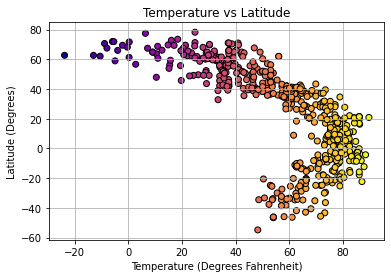

In [23]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

plt.scatter(clean_city_data["Max Temperature"], clean_city_data["Latitude"], c=clean_city_data['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

In [24]:
# Save as a file
plt.savefig('TempLat.png')

<Figure size 432x288 with 0 Axes>

In [25]:
# Print your analysis
print("This plot shows temperature vs. latitude.  It clearly shows a relationship between higher temperatures and proximity to the equator.")

This plot shows temperature vs. latitude.  It clearly shows a relationship between higher temperatures and proximity to the equator.


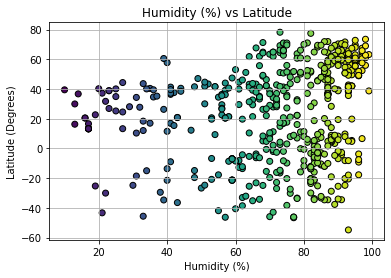

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot your Humidity vs Latitude
plt.scatter(clean_city_data["Humidity"], clean_city_data["Latitude"], c=clean_city_data['Humidity'], edgecolors="black", cmap="viridis")
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save a file
plt.savefig('HumidLat.png')

In [27]:
# Type analysis
print("This plot shows humidity vs. latitude for weather in cities based on location.  There appears to be a mirroring effect across the equator for humidity, with similar humidity numbers at inverse latitude coordinates.")

This plot shows humidity vs. latitude for weather in cities based on location.  There appears to be a mirroring effect across the equator for humidity, with similar humidity numbers at inverse latitude coordinates.


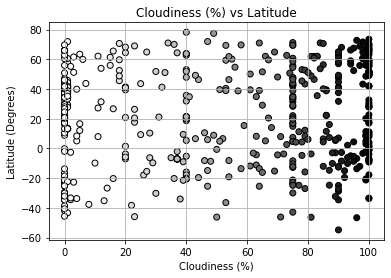

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot Cloudiness vs lat
plt.scatter(clean_city_data["Cloudiness"], clean_city_data["Latitude"], c=clean_city_data['Cloudiness'], edgecolors="black", cmap="Greys")
plt.title("Cloudiness (%) vs Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('CloudLat.png')

In [30]:
# Analysis
print("The percentage of cloudiness does not seem to be affected by latitude, as shown within this mostly evenly distributed graph.")

The percentage of cloudiness does not seem to be affected by latitude, as shown within this mostly evenly distributed graph.


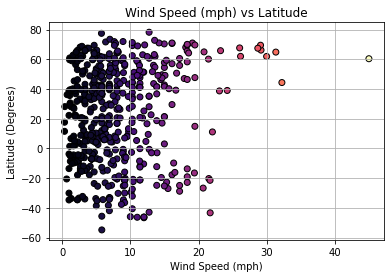

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot Wind Speeds vs Lat
plt.scatter(clean_city_data["Wind Speeds"], clean_city_data["Latitude"], c=clean_city_data['Wind Speeds'], edgecolors="black", cmap="magma")
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('WindLat.png')

In [32]:
# Analysis 
print("Wind speeds seem to not be affected by latitude much, showing an even distribution across the equator, with the exception of a few outliers in the Northern Hemisphere.")

Wind speeds seem to not be affected by latitude much, showing an even distribution across the equator, with the exception of a few outliers in the Northern Hemisphere.


In [33]:
# use .loc for northern and southern hemispheres
northern_hemi = weather_dataframe.loc[weather_dataframe['Latitude']>=0]
southern_hemi = weather_dataframe.loc[weather_dataframe['Latitude']<0]

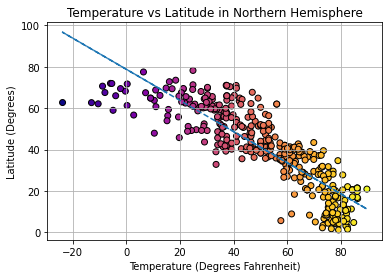

<Figure size 432x288 with 0 Axes>

In [34]:
# Plot Max Temp vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Max Temperature"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Max Temperature"]) + int
plt.plot(northern_hemi["Max Temperature"], fit, "--")

# Create the scatter plot
plt.scatter(northern_hemi["Max Temperature"], northern_hemi["Latitude"], c=northern_hemi['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude in Northern Hemisphere")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('TempLatNorth.png')

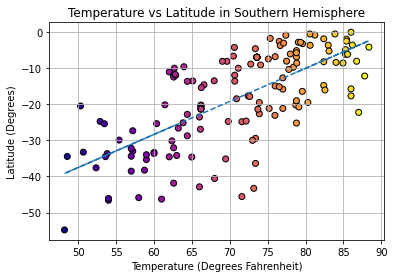

<Figure size 432x288 with 0 Axes>

In [35]:
# Plot Max Temp vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Max Temperature"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Max Temperature"]) + int
plt.plot(southern_hemi["Max Temperature"], fit, "--")

# Plot your scatter plot
plt.scatter(southern_hemi["Max Temperature"], southern_hemi["Latitude"], c=southern_hemi['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude in Southern Hemisphere")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('TempLatSouth.png')

In [36]:
# Analysis 
print("As evidenced by the two plots and their direct line of regression, it appears that the closer to the equator, the higher the temperature can be.  Temperatures seem to drop as distance from the equator increases.")

As evidenced by the two plots and their direct line of regression, it appears that the closer to the equator, the higher the temperature can be.  Temperatures seem to drop as distance from the equator increases.


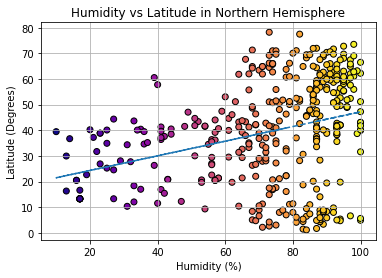

<Figure size 432x288 with 0 Axes>

In [37]:
# Plot Humidity vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Humidity"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Humidity"]) + int
plt.plot(northern_hemi["Humidity"], fit, "--")

# Create your scatter plot
plt.scatter(northern_hemi["Humidity"], northern_hemi["Latitude"], c=northern_hemi['Humidity'], edgecolors="black", cmap="plasma")
plt.title("Humidity vs Latitude in Northern Hemisphere")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('HumidLatNorth.png')

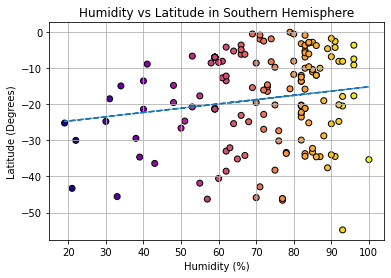

<Figure size 432x288 with 0 Axes>

In [38]:
# Plot Humidity vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Humidity"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Humidity"]) + int
plt.plot(southern_hemi["Humidity"], fit, "--")

# Plot your scatter plot
plt.scatter(southern_hemi["Humidity"], southern_hemi["Latitude"], c=southern_hemi['Humidity'], edgecolors="black", cmap="plasma")
plt.title("Humidity vs Latitude in Southern Hemisphere")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('HumidLatSouth.png')

In [40]:
# Analysis
print("Humidity seems to increase on both plots, showing an interesting aspect of humidity. It appears higher in the southern hemisphere nearest the equator, while the northern hemisphere shows higher amounts of humidity closer to the northern pole.")

Humidity seems to increase on both plots, showing an interesting aspect of humidity. It appears higher in the southern hemisphere nearest the equator, while the northern hemisphere shows higher amounts of humidity closer to the northern pole.


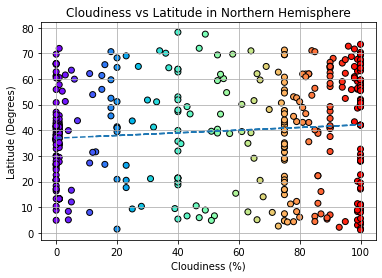

<Figure size 432x288 with 0 Axes>

In [41]:
# Plot Cloudiness vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Cloudiness"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Cloudiness"]) + int
plt.plot(northern_hemi["Cloudiness"], fit, "--")

# Make your scatter plot
plt.scatter(northern_hemi["Cloudiness"], northern_hemi["Latitude"], c=northern_hemi['Cloudiness'], edgecolors="black", cmap="rainbow")
plt.title("Cloudiness vs Latitude in Northern Hemisphere")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('CloudLatNorth.png')

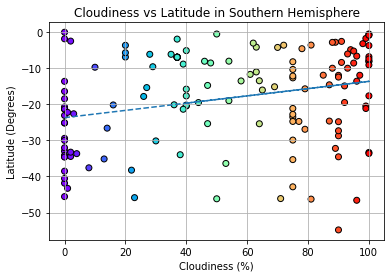

<Figure size 432x288 with 0 Axes>

In [42]:
# Plot Cloudiness vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Cloudiness"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Cloudiness"]) + int
plt.plot(southern_hemi["Cloudiness"], fit, "--")

# Plot the scatter plot!
plt.scatter(southern_hemi["Cloudiness"], southern_hemi["Latitude"], c=southern_hemi['Cloudiness'], edgecolors="black", cmap="rainbow")
plt.title("Cloudiness vs Latitude in Southern Hemisphere")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('CloudLatSouth.png')

In [43]:
# Analysis
print("Cloudiness does not seem to be affected by latitude.")

Cloudiness does not seem to be affected by latitude.


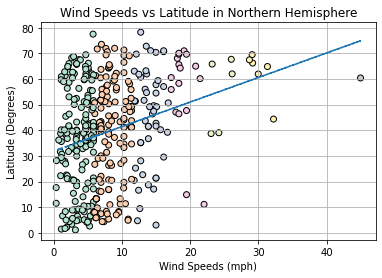

<Figure size 432x288 with 0 Axes>

In [44]:
# Plot Wind Speeds vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Wind Speeds"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Wind Speeds"]) + int
plt.plot(northern_hemi["Wind Speeds"], fit, "--")

# Plot the scatter plot!
plt.scatter(northern_hemi["Wind Speeds"], northern_hemi["Latitude"], c=northern_hemi['Wind Speeds'], edgecolors="black", cmap="Pastel2")
plt.title("Wind Speeds vs Latitude in Northern Hemisphere")
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('WindLatNorth.png')

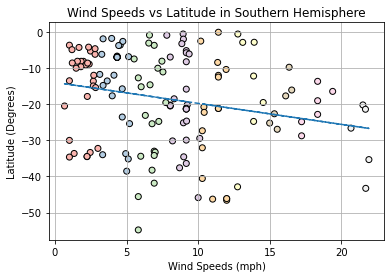

<Figure size 432x288 with 0 Axes>

In [45]:
# Plot Wind Speeds vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Wind Speeds"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Wind Speeds"]) + int
plt.plot(southern_hemi["Wind Speeds"], fit, "--")

# Plot the scatter plot!
plt.scatter(southern_hemi["Wind Speeds"], southern_hemi["Latitude"], c=southern_hemi['Wind Speeds'], edgecolors="black", cmap="Pastel1")
plt.title("Wind Speeds vs Latitude in Southern Hemisphere")
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('WindLatSouth.png')

In [46]:
# Analysis
print("Wind speed appears to slow a slight increase the further from the equator, and remains relatively denser and slower in the northern hemisphere.")

Wind speed appears to slow a slight increase the further from the equator, and remains relatively denser and slower in the northern hemisphere.
